# Cats and dogs classification by MANEET GUPTA

## Downloading dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

: 

In [ ]:
import zipfile as z
zippy = z.ZipFile('/content/dogs-vs-cats.zip','r')
zippy.extractall('/content')
zippy.close()

## importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout

## loading test and train data

In [ ]:
traind = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels ="inferred",
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)

)
testd = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels ="inferred",
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalizing images

In [ ]:
def normalization_process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
testd = testd.map(normalization_process)
traind = traind.map(normalization_process)

## Defining model 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

## Compiling model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics= ['accuracy'])


In [ ]:
history = model.fit(traind, epochs= 10, validation_data=testd)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.5538 - loss: 2.7949 - val_accuracy: 0.6698 - val_loss: 0.6038
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6859 - loss: 0.6048 - val_accuracy: 0.6484 - val_loss: 0.6194
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7532 - loss: 0.5147 - val_accuracy: 0.7718 - val_loss: 0.4782
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8041 - loss: 0.4335 - val_accuracy: 0.7258 - val_loss: 0.5477
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8324 - loss: 0.3761 - val_accuracy: 0.7590 - val_loss: 0.5328
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.8659 - loss: 0.3065 - val_accuracy: 0.7846 - val_loss: 0.5011
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8988 - loss: 0.2399 - val_accuracy: 0.7478 - val_loss: 0.6074
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9267 - loss: 0.1856 - 

## Getting statistics

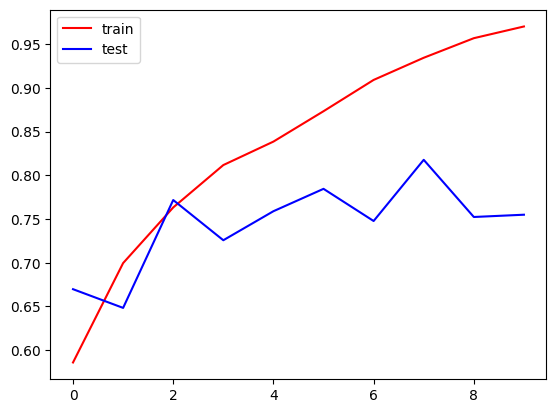

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

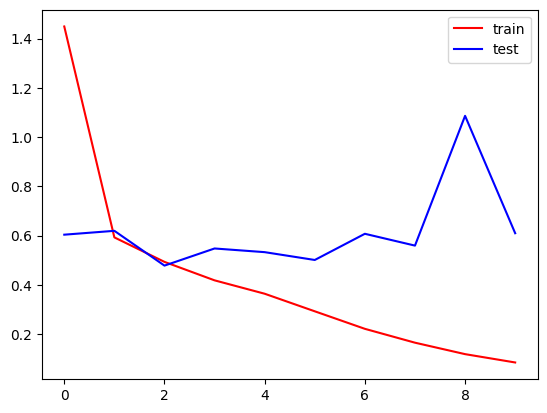

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

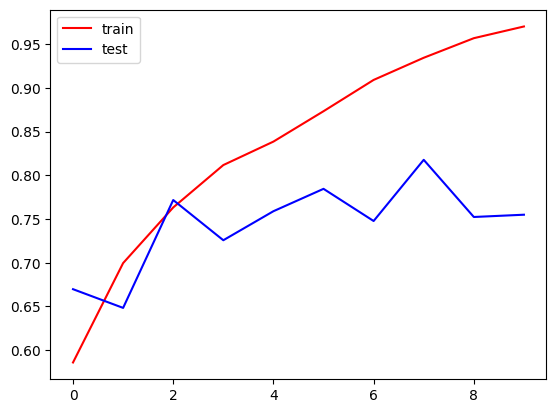

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

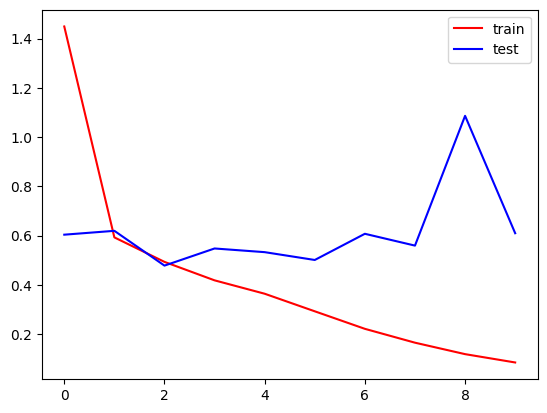

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
# evaluate model
_, acc = model.evaluate(testd, steps=len(testd), verbose=0)
print('> %.3f' % (acc * 100.0))

> 75.500


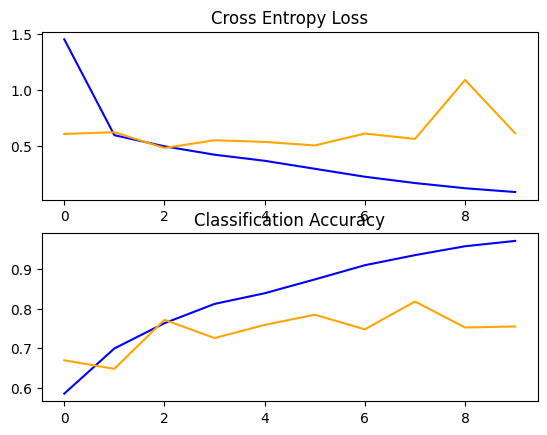

In [ ]:
# plot diagnostic learning curves
import matplotlib.pyplot as pyplot
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	pyplot.show()
summarize_diagnostics(history)

# Thankyou 
## additional improvements: more layers and good dataset
## Happy coding
